# Snapchat Political Ads
* **See the main project notebook for instructions to be sure you satisfy the rubric!**
* See Project 03 for information on the dataset.
* A few example prediction questions to pursue are listed below. However, don't limit yourself to them!
    * Predict the reach (number of views) of an ad.
    * Predict how much was spent on an ad.
    * Predict the target group of an ad. (For example, predict the target gender.)
    * Predict the (type of) organization/advertiser behind an ad.

Be careful to justify what information you would know at the "time of prediction" and train your model using only those features.

# Summary of Findings


### Introduction
    In dataframe ads, we have one column names "Impression" which represents "Number of times the Ad has been viewed by Snapchatters". To some degree, this value can show how much benefits this ads can bring to its company. In this project, I am gonna train a linear regression model to predict the 'Impression' values

* Prediction Problem: Predict the reach (number of views) of an ad.
* Problem Type: Regression problem, 
* Models Choosing: Linear Regression model for predicting. 
* Target Variable: Values in "Impression" column in ads dataframe
* Evaluation metrics: RMSE (rooted mean square error) for evaluating the accuracy and R2 score for evaluating how good our model fit to data


### Baseline Model
* Model description
For a baseline model, I am gonna use 1 quantitative data - Spend, and five catagorical data (nominal data) - Gender, RegionID, AgeBracket, Language, Segments. For baseline model, I will do nothing on the quantitative data and one hot every catagorical data (after replce all nan values with 'all'). Intuitively, all four parameters should somehow related to values in "Impression" and that is why I chose them for trainning baseline model.
    * X1: values in column "spend", which represents "Amount (In USD) spent by the advertiser over the campaign (up to the current date)". The values will keep as what they are. There will be no features engineering on it for now. It is a quantitative data.
    * X2: values in column "Gender", since nan values mean all genders here, we will first repalce nan with all and then one hot.
    * X3: values in column "RegionID", same with 'Gender'.
    * X4: values in column "AgeBracket", same with 'Gender'.
    * X5: values in column "Segments", same with 'Gender'
    * X6: values in column 'Language', same with'Gender'.
    * Y: values in 'Impressions"
    * test, train ration: 3:7
* Model Performance
    * For trainning sets, rmse is 2.028559e+06, and r2_score is 0.795591.	
    * For test sets, rmse is 2.010769e+06 and r2_score is 0.448908. 		
    * rmses are quite high
    * r2_score of trainning set are quite good, especially for a baseline model. However, what we care about is r2score for test sets. The baseline model did not really good on test sets, with r2scroe of only 0.407115. Our model may overfitted on the trainning set and when it predicts values on test sets, it did pretty bad
    
 
    
### Final Model
* Model description
We will add a new data - Duration, which is calculated by EndDate - StartDate (for null values in EndDate, I repalce them with 12/04/2019. The results will be numbers representing how many days the ad is on Snapchat. For both Duration and Spend, I will do no features.
Also, I add three features to catogricals data. For data Gender, Segments, RegionID, since the number of Nan values (replaced by "ALL") is too big that we will transform data to 0/1 (is all or not). For data Language, we will replace nan with all, keep en and replace all others with 'others' and then one hot. For data AgeBracket, we will replace nan with all and keep 18+ and 18-30 and then one hot. For the regressor model, we will still use linear regression but we will adt pvc and gready search for a best fitted model.
    * X1: values in column 'Spend', no features applied
    * X2: values in column 'EndDate' and 'StartDate', get how many days between two dates, replace nan values in 'EndDate' with 12/04/2019
    * X3: values in column 'AgeBracket', keep 'All', '18+' and '18-30', replace all others with 'others' and then one-hot.
    * X4: values in column 'Segments', replace 'ALl' with 1 and others with 0
    * X5: values in column 'Gender', same with X4
    * X6: values in column 'RegionID', same with X4
    * X7: values in column 'Language', keep 'All' and 'en', repalce all others with 'others' and then one-hot
    * Y: values in column 'Impressions'
    * test, train ration: 3:7
    
* Model Performence
    * For trainning sets, rmse is 2.466698e+06, and r2_score is 0.713277.	
    * For test sets, rmse is 1.355102e+06 and r2_score is 0.615836.
    * For both rmse, there is not a clear improvement than baseline model
    * However, for test sets, there is a huge improvement from 0.45 to 0.61
	
* Model Analysis
    * The model performence is not good enough, so we plot the data and found out that original data do not have a strong linear relationship and other relationships. As a result, we can not get a highly usefull data trained from such a data set.
    
    
### Fairness Evaluation
First, we fould out that there is a huge difference in rmse (between predicts of x_test and y_test) in three different catogories in column 'Gender'. This may means that our model have a unfair prediction toward a specific values in column "Gender".

* Then we first ran a permutation test to see whether our model will predicts a better result when 'Gender' is 'MALE'; 
    * Null Hypothesis: there is no difference between rmse in ['diff'] when Gender is MALE and total_rmse
    * Alternative Hypothesis: rmse in ['diff'] when Gender is MALE is lower than total_rmse, which means that our better predicts a better result when Gender is MALE
    * Test stats: difference between rooted mean square of column['diff'] when Gender is ‘MALE’ and total_rmse
    * Significant Level: 0.95
    * outcome p_value: 0.01 < 0.025
    * we have enough evidence to say null hypothesis is wrong.
   
* Then we ran a permutation test to see whether our model will predicts a worse result when 'Gender' is 'All';
    * Null Hypothesis: there is no difference between rmse in ['diff'] when Gender is All and NOTAll
    * Alternative Hypothesis: rmse in ['diff'] when Gender is ALL is higher than rmse in ['diff] when Gender is NOTAll.
    * Test stats: absolute difference between rooted mean square of column['diff'] when Gender is ‘ALL’ and NOTAll
    * Significant Level: 0.95
    * outcome p_value: 0.00 < 0.025
    * we have enough evidence to say null hypothesis is wrong.

Two permurtation test shows that our model do have a unfairness on 'Gender' input. More specifically, it will predicts a better result if input Gender is not 'All'

# Code

In [786]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dateutil.rrule import rrule, DAILY
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import datetime
import math
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
ads_2018 = pd.read_csv('data/2018.csv') #import data
ads_2019 = pd.read_csv('data/2019.csv') #import data
ads_2018 = ads_2018.assign(Year=2018) # assign a column represent the year before concate
ads_2019 = ads_2019.assign(Year=2019)
ads = pd.concat([ads_2018, ads_2019], axis=0) # concate two dataframe

In [658]:
ads.head()

,ADID,CreativeUrl,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,...,OsType,Segments,LocationType,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),Targeting Geo - Postal Code,CreativeProperties,Year
0,2ac103bc69cce2d24b198e6a6d052dbff2c25ae9b6bb9e...,https://www.snap.com/political-ads/asset/69afd...,165,49446,2018/11/01 22:42:22Z,2018/11/06 23:00:00Z,Bully Pulpit Interactive,"1140 Connecticut Ave NW, Suite 800,Washington,...",NaN,NextGen America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://nextgenamerica.org/lookup...,2018
1,40ee7e900be9357ae88181f5c8a56baf6d5aab0e8d0f51...,https://www.snap.com/political-ads/asset/0885d...,17,23805,2018/11/15 15:52:06Z,2018/11/24 15:50:38Z,Amnesty International Switzerland,CH,NaN,Amnesty International,...,NaN,Provided by Advertiser,NaN,de,NaN,NaN,NaN,NaN,NaN,2018
2,c80ca50681d552551ceaf625981c0202589ca710d51925...,https://www.snap.com/political-ads/asset/a36b7...,60,12883,2018/09/28 23:10:14Z,2018/10/10 02:00:00Z,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",NaN,Voter Participation Center,...,NaN,Provided by Advertiser,NaN,NaN,Marital Status (Single),NaN,NaN,NaN,web_view_url:https://www.voterparticipation.or...,2018
3,a3106af2289b62f57f63f4fb89753bdf94e2fadede0478...,https://www.snap.com/political-ads/asset/46819...,2492,377236,2018/10/27 19:23:19Z,2018/11/06 23:00:00Z,"Middle Seat Consulting, LLC","Po Box 21600,Washington,20009,US",NaN,Beto for Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://betofortexas.com/vote/?ut...,2018
4,7afda4224482eb70315797966b4dcdeb856df916df5bdc...,https://www.snap.com/political-ads/asset/ee833...,5795,467760,2018/10/25 04:00:00Z,2018/11/06 23:00:00Z,"Middle Seat Consulting, LLC","Po Box 21600,Washington,20009,US",NaN,Beto for Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


### Baseline Model

#### Model Training

In [977]:
X = ads.loc[:, ['Spend', 'Gender', 'Language', 'RegionID', "Segments", 'AgeBracket']] # get x values
X = X.fillna('All')
y = ads.Impressions # get y 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # get test and train sets

In [978]:
# cat
cat_feat = ['Language', 'Gender', 'RegionID', 'Segments', 'AgeBracket']
cat_transformer = Pipeline([
    ('one-hot', OneHotEncoder())
])

spend_feat = ['Spend']
spend_transformer = Pipeline([
    ('same', FunctionTransformer(lambda x: x))
])
# preprocessing pipeline (put them together)
preproc = ColumnTransformer([
    ('cat', cat_transformer, cat_feat),
    ('spend', spend_transformer, spend_feat)
])

plb = Pipeline([('preprocessor', preproc), ('regressor', LinearRegression())])

In [979]:
plb.fit(X, y)

C:\Users\xinrui zhan\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\xinrui zhan\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('one-hot',
                                                                   OneHotEncoder(categorical_features=None,
                                                                                 categories=None,
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                       

#### Performence

In [980]:
# get the predict values of trainning sets and calculate rmse and r2 score of trainning sets
base_predict_train = plb.predict(x_train)
base_rmse_train = math.sqrt(mean_squared_error(base_predict_train, y_train))
base_r2_train = plb.score(x_train, y_train)
print("baseline model rmse_train: ", base_rmse_train)
print("baseline model r2_train: ", base_r2_train)

baseline model rmse_train:  2028559.1175926698
baseline model r2_train:  0.7955913044571379


C:\Users\xinrui zhan\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\xinrui zhan\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [981]:
# get the predict values of test sets and calculate rmse and r2 score of test sets
base_predict_test = plb.predict(x_test)
base_rmse_test = math.sqrt(mean_squared_error(base_predict_test, y_test))
base_r2_test = plb.score(x_test, y_test)
print("baseline model rmse_test: ", base_rmse_test)
print("baseline model r2_test: ", base_r2_test)

baseline model rmse_test:  2010769.3499899418
baseline model r2_test:  0.44890792360942205


C:\Users\xinrui zhan\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\xinrui zhan\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [982]:
stats_baseline = pd.DataFrame([[base_rmse_train, base_r2_train], [base_rmse_test, base_r2_test]], columns=['rmse', 'r2'], index=['trainning sets', 'test sets'])
stats_baseline

,rmse,r2
trainning sets,2.028559e+06,0.795591
test sets,2.010769e+06,0.448908


As we can see, the rmse for both trainning sets and test sets are quite high (but we still do not know whether it is good or bad yet); The r2 score for both sets actually are quite good for a baseline model.

In [810]:
pd.DataFrame(base_predict_test).describe()

,0
count,9.960000e+02
mean,5.672722e+05
std,2.125240e+06
min,-5.588122e+06
25%,6.066061e+04
50%,1.780759e+05
75%,4.611449e+05
max,3.795103e+07


### Final Model

#### Analysis

In [918]:
X = ads.loc[:, ['Language', 'Spend', 'RegionID', 'Gender', "AgeBracket", 'StartDate', 'EndDate', 'Segments']] # get the x
X = clean(X) # calculate duration and repalce nan values
y = ads['Impressions'] # get the y
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [919]:
x_train['Gender'].value_counts()
# huge difference between both and female/male, so transform gender column to 'both/single (1/0)'

All       2102
FEMALE     167
MALE        53
Name: Gender, dtype: int64

In [920]:
x_train['Language'].value_counts()[:10]
# replace nan to all, en to en, and all others to other. Then use one-hot.

All      1672
en        404
fr         71
nb         44
nl         32
da         26
en,es      20
de         17
es         11
ar          7
Name: Language, dtype: int64

In [921]:
x_train['RegionID'].value_counts()[:10]
# same method with gender since the number of all is huge.

All           1619
Minnesota      212
Florida         43
Virginia        41
Colorado        40
Arizona         20
Iowa            20
Texas           15
Queensland      11
California      11
Name: RegionID, dtype: int64

In [922]:
x_train['AgeBracket'].value_counts()[:10]
# keep 18+, all, and 18-30, replace all others with 'others' and then one hot

18+      760
18-30    238
All      215
18-34    167
17+       81
18-24     74
25+       60
18-29     60
21+       57
18-25     54
Name: AgeBracket, dtype: int64

In [923]:
x_train['Segments'].value_counts()[:10]
# since only two, replace with 1/0 (all or provided by advertiser)

Provided by Advertiser    1540
All                        782
Name: Segments, dtype: int64

####  Helper functions

In [924]:
def cal_days(df):
    # calculating how many months
    df[['StartDate', 'EndDate']] = df[['StartDate', 'EndDate']].apply(pd.to_datetime) # transform 
    today = datetime.datetime(2019, 12, 5, tzinfo=datetime.timezone.utc)
    df['EndDate'] = df['EndDate'].fillna(today) # replace the nan with today(12/4/2019)
    func = lambda x: len([dt for dt in rrule(DAILY, dtstart=x['StartDate'], until=x['EndDate'])])
    duaration = df.apply(func, axis=1) # calculate how many days 
    return duaration

In [925]:
def clean(df):
    df = (
        df
        .assign(Duration=cal_days(df))
        .drop(columns=['StartDate', 'EndDate'])
        .fillna('All')
    )
    return df

In [926]:
def trans_01(df):
    return pd.DataFrame(df.iloc[:, 0].apply(lambda x: 1 if x == 'All' else 0))

In [927]:
def trans_language(df):
    df = df.iloc[:,0]
    df = df.apply(lambda x: 'others' if x != 'All' and x != 'en' else x)
    return pd.DataFrame(df)

In [928]:
def trans_age(df):
    df = df.iloc[:,0]
    df = df.apply(lambda x: 'others' if x != 'All' and x != '18+' and x != '18-30' else x)
    return pd.DataFrame(df)

#### Model Training

In [948]:
# transform spend to spend per day
money_feat = ['Spend']
money_transformer = Pipeline(steps=[
    ('money_p_d', FunctionTransformer(lambda x: x, validate=True))
])

duration_feat = ['Duration']
duration_transformer = Pipeline(steps=[
    ('duration', FunctionTransformer(lambda x: x, validate=True)),
    ('pca', PCA(svd_solver='full'))
])

# Gender
gender_feat = ['Gender']
gender_transformer = Pipeline(steps=[
    ('01', FunctionTransformer(trans_01, validate=False)),
    ('pca', PCA(svd_solver='full'))
])

# region
region_feat = ['RegionID']
region_transformer = Pipeline(steps=[
    ('01', FunctionTransformer(trans_01, validate=False)),
    ('pca', PCA(svd_solver='full'))
])

# language
language_feat = ['Language']
language_transformer = Pipeline(steps=[
    ('language', FunctionTransformer(trans_language, validate=False)),
    ('one-hot', OneHotEncoder(sparse=False)),
    ('pca', PCA(svd_solver='full'))
])

# AgeBracket
age_feat = ['AgeBracket']
age_transformer = Pipeline(steps=[
    ('age', FunctionTransformer(trans_age, validate=False)),
    ('one-hot', OneHotEncoder(sparse=False)),
    ('pca', PCA(svd_solver='full'))
])

# Segments
seg_feat = ['Segments']
seg_transformer = Pipeline(steps=[
    ('01', FunctionTransformer(trans_01, validate=False)),
    ('pca', PCA(svd_solver='full'))
])

# preprocessing pipeline (put them together)
preproc = ColumnTransformer(transformers=[
    ('money', money_transformer, money_feat), 
    ('Duration', duration_transformer, duration_feat),
    ('gender', gender_transformer, gender_feat), 
    ('region', region_transformer, region_feat),
    ('language', language_transformer, language_feat),
    ('seg', seg_transformer, seg_feat),
    ('Age', age_transformer, age_feat)
])

plf = Pipeline(steps=[('prep', preproc), ('regressor', LinearRegression())])

In [949]:
plf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'prep', 'regressor', 'prep__n_jobs', 'prep__remainder', 'prep__sparse_threshold', 'prep__transformer_weights', 'prep__transformers', 'prep__verbose', 'prep__money', 'prep__Duration', 'prep__gender', 'prep__region', 'prep__language', 'prep__seg', 'prep__Age', 'prep__money__memory', 'prep__money__steps', 'prep__money__verbose', 'prep__money__money_p_d', 'prep__money__money_p_d__accept_sparse', 'prep__money__money_p_d__check_inverse', 'prep__money__money_p_d__func', 'prep__money__money_p_d__inv_kw_args', 'prep__money__money_p_d__inverse_func', 'prep__money__money_p_d__kw_args', 'prep__money__money_p_d__pass_y', 'prep__money__money_p_d__validate', 'prep__Duration__memory', 'prep__Duration__steps', 'prep__Duration__verbose', 'prep__Duration__duration', 'prep__Duration__pca', 'prep__Duration__duration__accept_sparse', 'prep__Duration__duration__check_inverse', 'prep__Duration__duration__func', 'prep__Duration__duration__inv_kw_args', 'prep__Duration__

In [950]:
# fit model
ohtpara = [None, 0.90, 0.99, 0.8]
onezero = [None, 0.5, 1]
params = {'prep__language__pca__n_components':ohtpara, 
          'prep__Age__pca__n_components':ohtpara,
          'prep__Duration__pca__n_components':onezero,
          'prep__seg__pca__n_components':onezero,
          'prep__gender__pca__n_components':onezero,
          'prep__region__pca__n_components':onezero}
grids = GridSearchCV(plf, param_grid=params, cv=5, iid=False)
grids.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('money',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('money_p_d',
                                                                                          FunctionTransformer(accept_sparse=False,
                                                                                                              check_inverse=True,
   

In [953]:
grids.best_params_

{'prep__Age__pca__n_components': 0.8,
 'prep__Duration__pca__n_components': None,
 'prep__gender__pca__n_components': None,
 'prep__language__pca__n_components': None,
 'prep__region__pca__n_components': None,
 'prep__seg__pca__n_components': None}

In [951]:
# get the predict values of trainning sets and calculate rmse and r2 score of trainning sets
final_predict_train = grids.predict(x_train)
final_rmse_train = math.sqrt(mean_squared_error(final_predict_train, y_train))
final_r2_train = grids.score(x_train, y_train)
print("final model rmse_train: ", final_rmse_train)
print("final model r2_train: ", final_r2_train)

final model rmse_train:  2466698.010610956
final model r2_train:  0.7132773197014166


In [952]:
# get the predict values of test sets and calculate rmse and r2 score of test sets
final_predict_test = grids.predict(x_test)
final_rmse_test = math.sqrt(mean_squared_error(final_predict_test, y_test))
final_r2_test = grids.score(x_test, y_test)
print("final model rmse_test: ", final_rmse_test)
print("final model r2_test: ", final_r2_test)

final model rmse_test:  1355101.7457937612
final model r2_test:  0.6158357853569362


In [985]:
stats_final = pd.DataFrame([[final_rmse_train, final_r2_train], [final_rmse_test, final_r2_test]], columns=['rmse', 'r2'], index=['trainning sets', 'test sets'])
stats_final

,rmse,r2
trainning sets,2.466698e+06,0.713277
test sets,1.355102e+06,0.615836


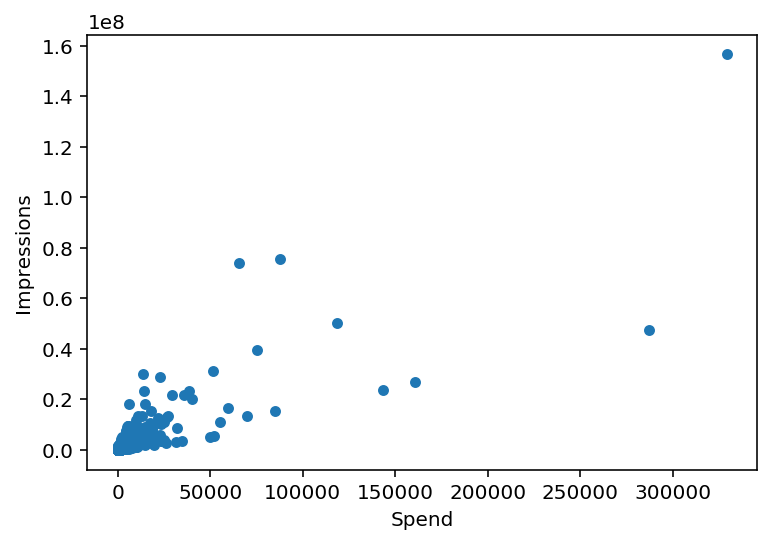

In [940]:
ads[['Spend', 'Impressions']].plot(x='Spend', y='Impressions', kind='Scatter') # a few outliers 

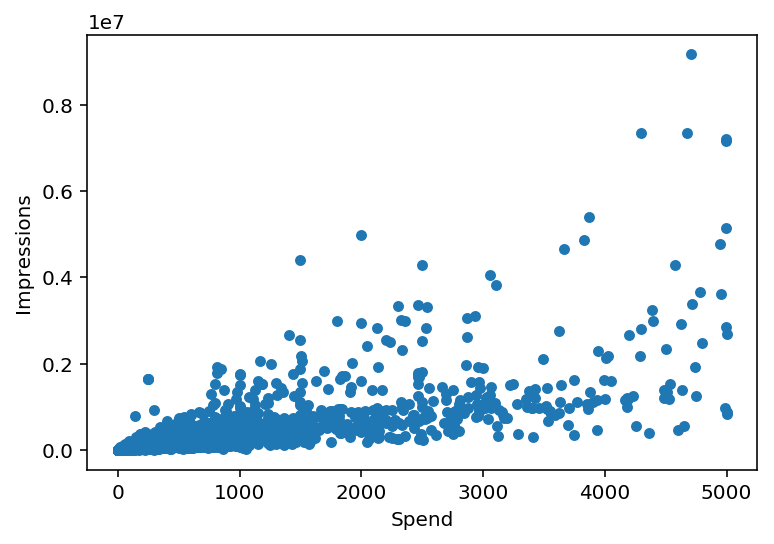

In [941]:
ads.loc[ads['Spend'] <= 5000][['Spend', 'Impressions']].plot(x='Spend', y='Impressions', kind='Scatter') # without outliers

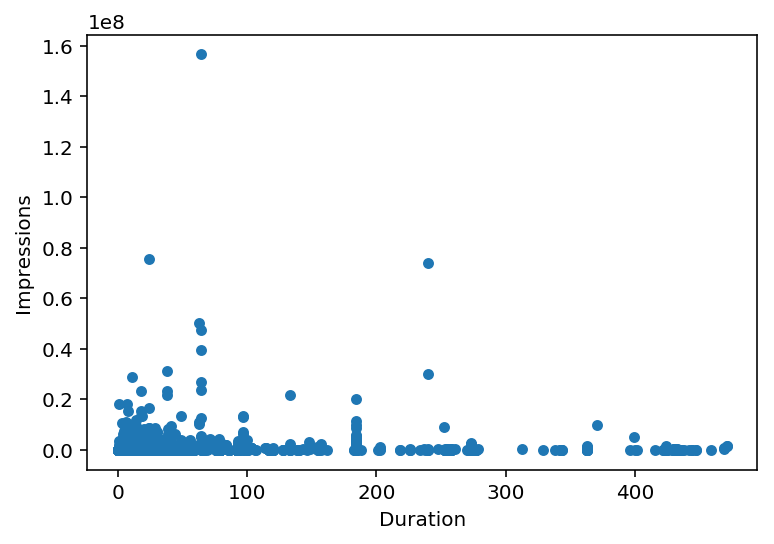

In [946]:
full = X.assign(Impressions=y)
full[['Duration', 'Impressions']].plot(x='Duration', y='Impressions', kind='Scatter')

### Fairness Evaluation

In [1070]:
# Fairness will be investigated in predict values of x_test.
fair = (
    x_test
    .assign(predicts=final_predict_test)
    .assign(real=y_test)
    .reset_index(drop=True)
)

In [1071]:
fair.head() # values 'All' means nan in orignial dataset. it will have no effect on our Fair

,Language,Spend,RegionID,Gender,AgeBracket,Segments,Duration,predicts,real
0,All,252,All,FEMALE,18+,Provided by Advertiser,15,220551.171258,71739
1,All,119,Wien,All,35++,Provided by Advertiser,21,100693.379105,73232
2,en,314,All,All,20-,All,66,239700.253395,169006
3,All,19,Minnesota,All,18-30,Provided by Advertiser,77,25521.459368,6240
4,en,1,All,All,All,Provided by Advertiser,50,28075.053181,696


In [1072]:
# assign differen column |predicts - real|
fair = fair.assign(diff=abs(fair['predicts'] - fair['real']))
fair.head()

,Language,Spend,RegionID,Gender,AgeBracket,Segments,Duration,predicts,real,diff
0,All,252,All,FEMALE,18+,Provided by Advertiser,15,220551.171258,71739,148812.171258
1,All,119,Wien,All,35++,Provided by Advertiser,21,100693.379105,73232,27461.379105
2,en,314,All,All,20-,All,66,239700.253395,169006,70694.253395
3,All,19,Minnesota,All,18-30,Provided by Advertiser,77,25521.459368,6240,19281.459368
4,en,1,All,All,All,Provided by Advertiser,50,28075.053181,696,27379.053181


In [1073]:
# total rmse
total_rmse = final_rmse_test
total_rmse

1355101.7457937612

In [1074]:
# lets see how each gender's performence
grps = fair.groupby('Gender')['diff'].apply(lambda x: math.sqrt((x**2).sum()))
grps

Gender
All       1.465952e+07
FEMALE    1.610217e+06
MALE      6.761784e+05
Name: diff, dtype: float64

we see there is a huge difference between 'MALE' and total_rmse, lets run a permutation test to see whether these is a unfair prediction toward 'MALE'. More specifically, models did better on data whose Gender value is MALE

* Null Hypothesis: there is no difference between rmse in ['diff'] when Gender is MALE and total_rmse
* Alternative Hypothesis: rmse in ['diff'] when Gender is MALE is lower than total_rmse, which means that our better predicts a better result when Gender is MALE
* Test stats: difference between rooted mean square of column['diff'] when Gender is ‘MALE’ and total_rmse
* Significant Level: 0.95

In [1075]:
g = fair[['Gender', 'diff']]
obs = total_rmse - grps['MALE']
obs

678923.3085604407

In [1079]:
stats = []
for i in range(100):
    spl = pd.DataFrame()
    spl = (
        spl
        .assign(samp_gender=(g['Gender'].sample(frac=1, replace=False).reset_index(drop=True)))
        .assign(samp_diff=g['diff'])
        .groupby('samp_gender')['samp_diff'].apply(lambda x: math.sqrt((x**2).sum()))
    )
    stats.append(total_rmse - spl['MALE'])

In [1081]:
p_value = (stats > obs).sum()/len(stats)
p_value

0.01

Since 0.01 < 0.025, we have enough evidence to say null hypothesis is wrong. In other words, we may can say that our model did a better job on columns whose Gender is MALE. However, remeber that we combined "MALE" and "FEMALE' into one category "NOT All" when trainning our model. As a result, if our model did a better job on "MALE", it should did a better job on "FEMALE" too. In other words, our model should predicts a high rmse results when "Gender" is 'ALL'


so lets run a permutation test to see whether our model have a bias on column whose Gender is 'ALL'. 

In [1053]:
# 
test_all = fair[['Gender', 'diff']]
test_all.loc[:,'Gender'] = test_all['Gender'].replace({'MALE': 'NOTAll', 'FEMALE': 'NOTAll'})
test_all.head()

,Gender,diff
0,NOTAll,148812.171258
1,All,27461.379105
2,All,70694.253395
3,All,19281.459368
4,All,27379.053181


* Null Hypothesis: there is no difference between rmse in ['diff'] when Gender is All and NOTAll
* Alternative Hypothesis: rmse in ['diff'] when Gender is ALL is higher than rmse in ['diff] when Gender is NOTAll.
* Test stats: absolute difference between rooted mean square of column['diff'] when Gender is ‘ALL’ and NOTAll
* Significant Level: 0.95

In [1056]:
grps = test_all.groupby('Gender')['diff'].apply(lambda x: math.sqrt((x**2).sum()))
grps

Gender
All       1.465952e+07
NOTAll    1.746430e+06
Name: diff, dtype: float64

In [1065]:
obs = grps[0] - grps[1]
obs

12913085.629401743

In [1066]:
stats = []
for i in range(100):
    spl = pd.DataFrame()
    spl = (
        spl
        .assign(samp_gender=(test_all['Gender'].sample(frac=1, replace=False).reset_index(drop=True)))
        .assign(samp_diff=test_all['diff'])
        .groupby('samp_gender')['samp_diff'].apply(lambda x: math.sqrt((x**2).sum()))
    )
    stats.append(spl[0] - spl[1])

In [1067]:
p_value = (stats > obs).sum()/len(stats)
p_value

0.0

since 0,0 is less than 0.025, we have enough evidences to say that rmse in ['diff'] when Gender is All is higher than rmse in ['diff'] when Gender is 'MALE" or "FEMALE"; In other words, we may can say our model has a bias toward input whose Gender is "ALL".